# `Module 3`: Introduction to NN Frameworks

 ### train a neural network to accurately classify handwritten digits from the MNIST dataset.
 * The goal is to navigate through the preprocessing of image data, select an appropriate neural network architecture, and apply optimization techniques to achieve high
 classification accuracy.

* The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image. The goal is to build a neural network model that can accurately classify these images into one of the ten digit classes (0 through 9).

# `Objectives`:

* Data Preprocessing
* Model Development
* Training
* Evaluation
* Prediction
* Analysis

# ---------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

from torchvision import transforms, datasets
from torch.utils.data import DataLoader

import torch.nn as nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
custom_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [ ]:
train_data = datasets.MNIST(root='/content/datasets', download=True, train=True, transform=custom_transform)
test_data = datasets.MNIST(root='/content/datasets', download=True, train=False, transform=custom_transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 10.5MB/s]


Extracting /content/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /content/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]


Extracting /content/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /content/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]


Extracting /content/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.72MB/s]

Extracting /content/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/datasets/MNIST/raw



In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
sample = iter(train_loader)
img, lab = next(sample)

In [ ]:
img.shape

torch.Size([32, 1, 28, 28])

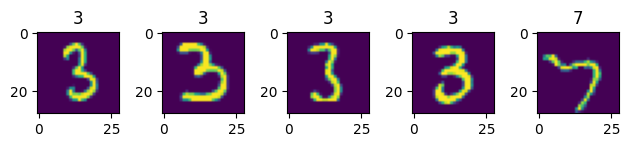

In [ ]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(img[i][0])
    plt.title(lab[i].item())
    plt.tight_layout()

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.inp_layer = nn.Linear(28*28, 500)
        self.hid_layer1 = nn.Linear(500, 250)
        self.hid_layer2 = nn.Linear(250, 125)
        self.hid_layer3 = nn.Linear(125, 65)
        self.out_layer = nn.Linear(65, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.inp_layer(x))
        x = self.relu(self.hid_layer1(x))
        x = self.relu(self.hid_layer2(x))
        x = self.relu(self.hid_layer3(x))
        out = self.out_layer(x)
        return out

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (inp_layer): Linear(in_features=784, out_features=500, bias=True)
  (hid_layer1): Linear(in_features=500, out_features=250, bias=True)
  (hid_layer2): Linear(in_features=250, out_features=125, bias=True)
  (hid_layer3): Linear(in_features=125, out_features=65, bias=True)
  (out_layer): Linear(in_features=65, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# train model
for epoch in range(50):
    total_loss = 0
    for img, lab in train_loader:
        img, lab = img.to(device), lab.to(device)
        img = img.reshape(-1, 28*28)
        pred = model(img)

        optimizer.zero_grad()
        loss = criterion(pred, lab)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"epoch: {epoch+1} loss: {total_loss:.4f}")

epoch: 1 loss: 4306.6383
epoch: 2 loss: 4272.2149
epoch: 3 loss: 4183.9585
epoch: 4 loss: 3769.8767
epoch: 5 loss: 2643.6927
epoch: 6 loss: 1758.2695
epoch: 7 loss: 1284.4406
epoch: 8 loss: 1058.2413
epoch: 9 loss: 912.6521
epoch: 10 loss: 820.5994
epoch: 11 loss: 765.2775
epoch: 12 loss: 724.4265
epoch: 13 loss: 692.2097
epoch: 14 loss: 665.1561
epoch: 15 loss: 640.8578
epoch: 16 loss: 618.2644
epoch: 17 loss: 597.9699
epoch: 18 loss: 578.9119
epoch: 19 loss: 560.2485
epoch: 20 loss: 542.9670
epoch: 21 loss: 526.0958
epoch: 22 loss: 509.9294
epoch: 23 loss: 493.8302
epoch: 24 loss: 477.4324
epoch: 25 loss: 462.8428
epoch: 26 loss: 447.3103
epoch: 27 loss: 433.3546
epoch: 28 loss: 418.7587
epoch: 29 loss: 404.7241
epoch: 30 loss: 391.1082
epoch: 31 loss: 378.3517
epoch: 32 loss: 366.0648
epoch: 33 loss: 353.9290
epoch: 34 loss: 342.9104
epoch: 35 loss: 332.8526
epoch: 36 loss: 322.4770
epoch: 37 loss: 312.3003
epoch: 38 loss: 302.8284
epoch: 39 loss: 294.1493
epoch: 40 loss: 285.8321
e

In [ ]:
# Evalute model
with torch.no_grad():
    total = 0
    total_correct = 0
    for imgs, labs in test_loader:

        imgs, labs = imgs.to(device), labs.to(device)
        imgs = imgs.reshape(-1, 28*28)
        output = model(imgs)
        predict = torch.argmax(output, dim=1)

        total += imgs.size(0)
        total_correct += (predict == labs).sum().item()

    print(f"Model accuracy is {total_correct/total*100:0.2f}%")

Model accuracy is 96.01%


In [ ]:
sample = iter(test_loader)
img, _ = next(sample)

In [ ]:
def prediction(imgs):
    with torch.no_grad():
        imgs = imgs.to(device)
        imgs = imgs.reshape(-1, 28*28)
        out = model(imgs)
        prediction = torch.argmax(out, 1)
        return prediction

In [ ]:
pred_lab = prediction(img).cpu()

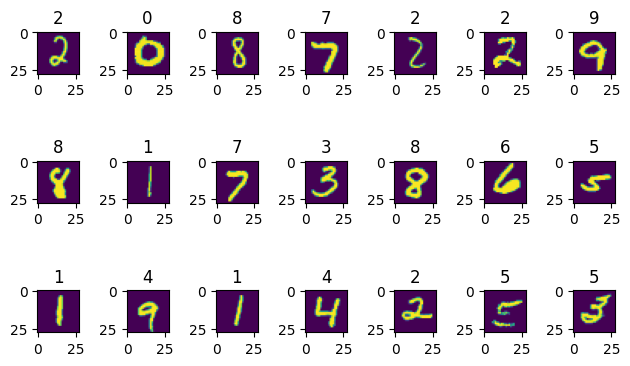

In [ ]:
for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.imshow(img[i][0])
    plt.title(np.array(pred_lab)[i])
    plt.tight_layout()